In [1]:
# Testing out a rough CSV and then regress it!
import numpy as np
import pandas as pd
import random
import csv
from statistics import mean
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# training data - validated
trainHeader = ['x', 'y']
smp1 = [6.94, 2.0]
smp2 = [0.19, -0.07]
smp3 = [5.70, -0.32]
smp4 = [6.74, 1.17]
smp5 = [4.49, -1.16]
smp6 = [2.02, -0.71]
smp7 = [1.78, -2.74]
smp8 = [6.84, 2.56]
smp9 = [1.52, -1.37]
smp10 = [0.80, -0.49]

# testing data
testHeader = ['x', 'y']
smp1_test = [4.88, -1.17]
smp2_test = [1.28, -0.01]
smp3_test = [3.36, -2.39]
smp4_test = [6.07, 0.82]
smp5_test = [3.98, -2.18]
smp6_test = [3.91, -2.49]
smp7_test = [5.56, -0.38]
smp8_test = [4.62, -1.97]
smp9_test = [5.85, 1.19]
smp10_test = [5.41, -0.50]


[[6.94]
 [0.19]
 [5.7 ]
 [6.74]
 [4.49]
 [2.02]
 [1.78]
 [6.84]
 [1.52]
 [0.8 ]]
[ 2.   -0.07 -0.32  1.17 -1.16 -0.71 -2.74  2.56 -1.37 -0.49]
[6.94 0.19 5.7  6.74 4.49 2.02 1.78 6.84 1.52 0.8 ]
[[0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]]
[[1.   6.94]
 [1.   0.19]
 [1.   5.7 ]
 [1.   6.74]
 [1.   4.49]
 [1.   2.02]
 [1.   1.78]
 [1.   6.84]
 [1.   1.52]
 [1.   0.8 ]]
[[ 10.      37.02  ]
 [ 37.02   203.2622]]
Parameters: 
[-1.65766519  0.41725154]
theta_1a: 
[-1.65766519  0.41725154]


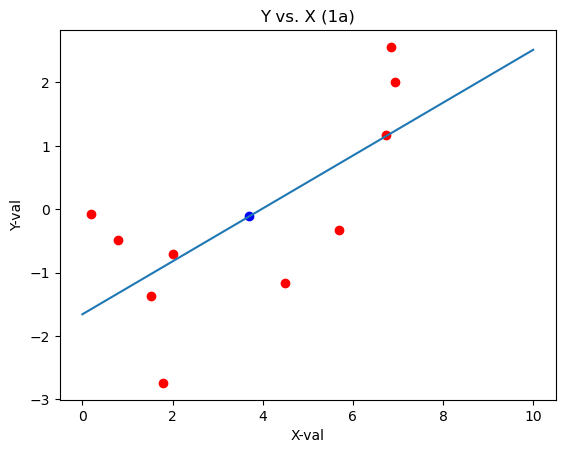

In [2]:
f = open('trainingDataSamples.csv', 'w')
writer = csv.writer(f)
writer.writerow(trainHeader)
writer.writerow(smp1)
writer.writerow(smp2)
writer.writerow(smp3)
writer.writerow(smp4)
writer.writerow(smp5)
writer.writerow(smp6)
writer.writerow(smp7)
writer.writerow(smp8)
writer.writerow(smp9)
writer.writerow(smp10)
f.close() # Not closing the file causes the CSV to not save.

f = open('testingDataSamples.csv', 'w')
writer = csv.writer(f)
writer.writerow(testHeader)
writer.writerow(smp1_test)
writer.writerow(smp2_test)
writer.writerow(smp3_test)
writer.writerow(smp4_test)
writer.writerow(smp5_test)
writer.writerow(smp6_test)
writer.writerow(smp7_test)
writer.writerow(smp8_test)
writer.writerow(smp9_test)
writer.writerow(smp10_test)
f.close()


# Q1. Calculate analytical solution for linear model. Use J(theta) = |y_hat-y|^2

dataset = pd.read_csv('trainingDataSamples.csv')
X = dataset.iloc[:,:-1].values
y = dataset.iloc[:,1].values 

print(X)
print(y)
X_transpose = X.transpose()
print(X_transpose[0])             # convert [[ numbers .. ]] --> [numbers ..]
# 1a. calculate y = mx+b
meanY = mean(y)
meanX = mean(X_transpose[0])
X_transpose = X_transpose[0]

# ----------------------- Part 1a complete -----------------------------------------
# ---------------------- REDO part 1a ----------------------------------------------
a = np.zeros(shape=(10, 2))
print(a)
for i in range(0,10):
    a[i][0] = 1
    a[i][1] = X_transpose[i]
print(a)                                   # a is now representative of X
a_transpose = a.transpose()
temp = np.matmul(a_transpose, a)
print(temp)
temp_2 = np.linalg.inv(temp)
temp = np.matmul(temp_2, a_transpose)
temp_2 = np.matmul(temp, y)
print("Parameters: ")
print(temp_2)
theta_1a = temp_2
print("theta_1a: ")
print(theta_1a)
plt.scatter(X, y, color='red')
plt.scatter(meanX, meanY, color = 'blue')
plt.title("Y vs. X (1a)")
plt.xlabel("X-val")
plt.ylabel("Y-val")
x = np.linspace(0, 10, 1000)
plt.plot(x, temp_2[0]+temp_2[1]*x)
plt.show()
# -------------------------------- part 1a complete -----------------------------------

[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
[[1.00000e+00 6.94000e+00 4.81636e+01]
 [1.00000e+00 1.90000e-01 3.61000e-02]
 [1.00000e+00 5.70000e+00 3.24900e+01]
 [1.00000e+00 6.74000e+00 4.54276e+01]
 [1.00000e+00 4.49000e+00 2.01601e+01]
 [1.00000e+00 2.02000e+00 4.08040e+00]
 [1.00000e+00 1.78000e+00 3.16840e+00]
 [1.00000e+00 6.84000e+00 4.67856e+01]
 [1.00000e+00 1.52000e+00 2.31040e+00]
 [1.00000e+00 8.00000e-01 6.40000e-01]]
[[  10.           37.02        203.2622    ]
 [  37.02        203.2622     1254.075588  ]
 [ 203.2622     1254.075588   8066.75858018]]
Parameters: 
[ 0.28514264 -1.48968069  0.25172685]


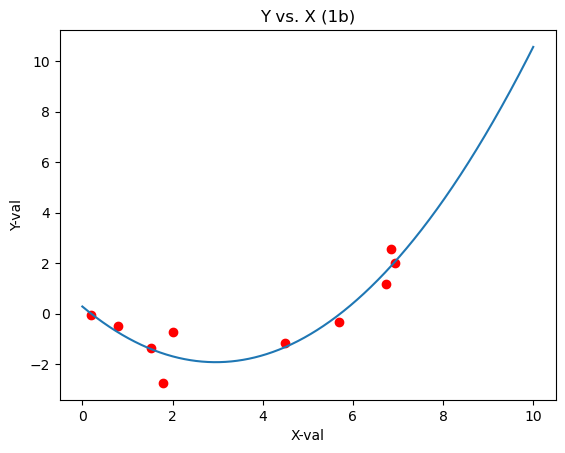

In [3]:
# part 1b. 
a = np.zeros(shape=(10, 3))
print(a)
for i in range(0,10):
    a[i][0] = 1
    a[i][1] = X_transpose[i]
    a[i][2] = X_transpose[i]**2
print(a)                                   # a is now representative of X
a_transpose = a.transpose()
temp = np.matmul(a_transpose, a)
print(temp)
temp_2 = np.linalg.inv(temp)
temp = np.matmul(temp_2, a_transpose)
temp_2 = np.matmul(temp, y)
print("Parameters: ")
print(temp_2)
theta_1b = temp_2

# NOW, plot the line with data
plt.scatter(X, y, color='red')
plt.title("Y vs. X (1b)")
plt.xlabel("X-val")
plt.ylabel("Y-val")
x = np.linspace(0, 10, 1000)
plt.plot(x, temp_2[0]+temp_2[1]*x+temp_2[2]*(x**2))
plt.show()
# ----------------------- Part 1b complete --------------------------------------

[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
[[1.00000000e+00 6.94000000e+00 4.81636000e+01 3.34255384e+02
  2.31973236e+03]
 [1.00000000e+00 1.90000000e-01 3.61000000e-02 6.85900000e-03
  1.30321000e-03]
 [1.00000000e+00 5.70000000e+00 3.24900000e+01 1.85193000e+02
  1.05560010e+03]
 [1.00000000e+00 6.74000000e+00 4.54276000e+01 3.06182024e+02
  2.06366684e+03]
 [1.00000000e+00 4.49000000e+00 2.01601000e+01 9.05188490e+01
  4.06429632e+02]
 [1.00000000e+00 2.02000000e+00 4.08040000e+00 8.24240800e+00
  1.66496642e+01]
 [1.00000000e+00 1.78000000e+00 3.16840000e+00 5.63975200e+00
  1.00387586e+01]
 [1.00000000e+00 6.84000000e+00 4.67856000e+01 3.20013504e+02
  2.18889237e+03]
 [1.00000000e+00 1.52000000e+00 2.31040000e+00 3.51180800e+00
  5.33794816e+00]
 [1.00000000e+00 8.00000000e-01 6.40000000e-01 5.12000000e-01
  4.09600000e-01]]
[[1.00000000e+01 3

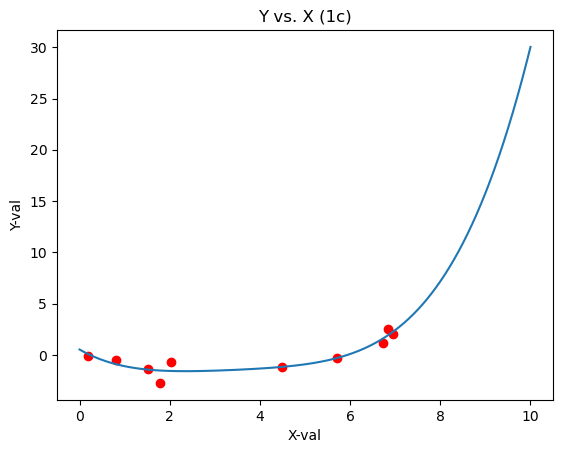

In [4]:
# part 1c
c = np.zeros(shape=(10, 5))
print(c)
for i in range(0,10):
    c[i][0] = 1
    c[i][1] = X_transpose[i]
    c[i][2] = X_transpose[i]**2
    c[i][3] = X_transpose[i]**3
    c[i][4] = X_transpose[i]**4
print(c)
c_transpose = c.transpose()
temp = np.matmul(c_transpose, c)
print(temp)
temp_2 = np.linalg.inv(temp)
temp = np.matmul(temp_2, c_transpose)
temp_2 = np.matmul(temp, y)
print("Parameters: ")
print(temp_2)
theta_1c = temp_2

# NOW, plot the line with data
plt.scatter(X, y, color='red')
plt.title("Y vs. X (1c)")
plt.xlabel("X-val")
plt.ylabel("Y-val")
x = np.linspace(0, 10, 1000)
plt.plot(x, temp_2[0]+temp_2[1]*x+temp_2[2]*(x**2)+temp_2[3]*(x**3)+temp_2[4]*(x**4))
plt.show()
# ---------------------- part 1c complete  -----------------------------------------------

In [5]:
# part 1d ----------------------------------------------------------------- Used training data -------
# load data into X, theta, Y. Perform calculations on TEST DATA.
# a = np.zeros(shape=(10, 2))
# print(a)
# for i in range(0,10):
#     a[i][0] = 1
#     a[i][1] = X_transpose[i]
# print(a)                                   # theta + thetaX populated.
# print(theta_1a)                            # check
# temp = np.matmul(a, theta_1a)              # X*theta
# temp_2 = temp-y                            # X*theta-Y
# temp = temp_2.transpose()                  # (X*theta-Y)T
# result_1a = np.matmul(temp,temp_2)
# print("J(theta) for 1a: "+ str(result_1a))

# b = np.zeros(shape=(10,3))
# for i in range(0,10):
#     b[i][0] = 1
#     b[i][1] = X_transpose[i]
#     b[i][2] = X_transpose[i]**2
# print(b)
# print(theta_1b)
# temp = np.matmul(b, theta_1b)              # X*theta
# temp_2 = temp-y                            # X*theta-Y
# temp = temp_2.transpose()                  # (X*theta-Y)T
# result_1b = np.matmul(temp,temp_2)
# print("J(theta) for 1b: "+ str(result_1b))

# c = np.zeros(shape=(10,5))
# for i in range(0,10):
#     c[i][0] = 1
#     c[i][1] = X_transpose[i]
#     c[i][2] = X_transpose[i]**2
#     c[i][3] = X_transpose[i]**3
#     c[i][4] = X_transpose[i]**4
# print(c)
# print(theta_1c)
# temp = np.matmul(c, theta_1c)              # X*theta
# temp_2 = temp-y                            # X*theta-Y
# temp = temp_2.transpose()                  # (X*theta-Y)T
# result_1c = np.matmul(temp,temp_2)
# print("J(theta) for 1c: "+ str(result_1c))
# ----------------------------------------------------------------------------------------------------- VOID CODE ----

In [6]:
# - Model using test data
# ------- load test data ----------------------------------
dataset = pd.read_csv('testingDataSamples.csv')
X_test = dataset.iloc[:,:-1].values
y_test = dataset.iloc[:,1].values
X_test_transpose = X_test.transpose()
X_test = X_test_transpose[0]
print("X_test")
print(X_test)                       # Verified.
# ---------------------------------------------------------

a = np.zeros(shape=(10, 2))
print(a)
for i in range(0,10):
    a[i][0] = 1
    a[i][1] = X_test[i]
print(a)                                   # theta + thetaX populated.
print(theta_1a)                            # check
temp = np.matmul(a, theta_1a)              # X*theta
temp_2 = temp-y                            # X*theta-Y
temp = temp_2.transpose()                  # (X*theta-Y)T
result_1a = np.matmul(temp,temp_2)
print("J(theta) for 1a: "+ str(result_1a))

b = np.zeros(shape=(10, 3))
print(b)
for i in range(0,10):
    b[i][0] = 1
    b[i][1] = X_test[i]
    b[i][2] = X_test[i]**2
print(b)                                   # theta + thetaX populated.
print(theta_1b)                            # check
temp = np.matmul(b, theta_1b)              # X*theta
temp_2 = temp-y                            # X*theta-Y
temp = temp_2.transpose()                  # (X*theta-Y)T
result_1b = np.matmul(temp,temp_2)
print("J(theta) for 1b: "+ str(result_1b))

c = np.zeros(shape=(10, 5))
print(c)
for i in range(0,10):
    c[i][0] = 1
    c[i][1] = X_test[i]
    c[i][2] = X_test[i]**2
    c[i][3] = X_test[i]**3
    c[i][4] = X_test[i]**4
print(c)
print(theta_1c)                            # check
temp = np.matmul(c, theta_1c)              # X*theta
temp_2 = temp-y                            # X*theta-Y
temp = temp_2.transpose()                  # (X*theta-Y)T
result_1c = np.matmul(temp,temp_2)
print("J(theta) for 1c: "+ str(result_1c))


X_test
[4.88 1.28 3.36 6.07 3.98 3.91 5.56 4.62 5.85 5.41]
[[0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]]
[[1.   4.88]
 [1.   1.28]
 [1.   3.36]
 [1.   6.07]
 [1.   3.98]
 [1.   3.91]
 [1.   5.56]
 [1.   4.62]
 [1.   5.85]
 [1.   5.41]]
[-1.65766519  0.41725154]
J(theta) for 1a: 28.293625229233335
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
[[ 1.      4.88   23.8144]
 [ 1.      1.28    1.6384]
 [ 1.      3.36   11.2896]
 [ 1.      6.07   36.8449]
 [ 1.      3.98   15.8404]
 [ 1.      3.91   15.2881]
 [ 1.      5.56   30.9136]
 [ 1.      4.62   21.3444]
 [ 1.      5.85   34.2225]
 [ 1.      5.41   29.2681]]
[ 0.28514264 -1.48968069  0.25172685]
J(theta) for 1b: 37.4174692257833
[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
[[1.00000000

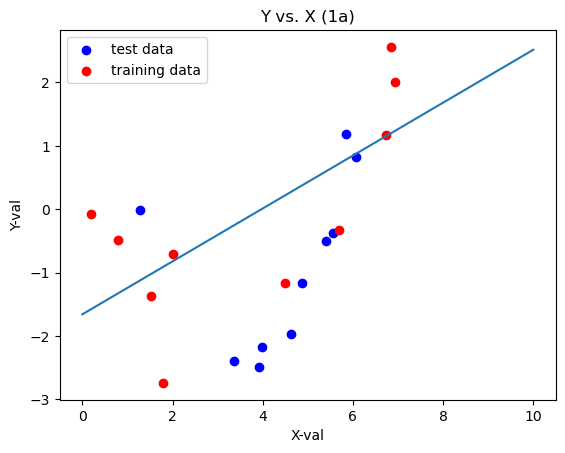

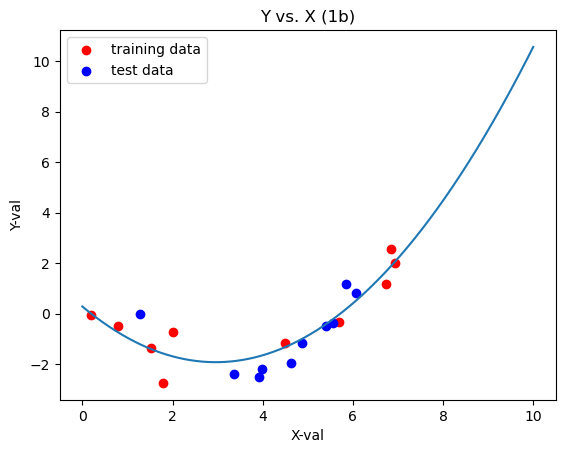

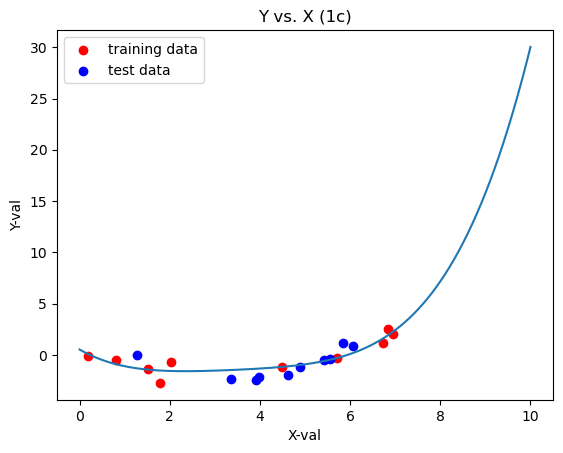

In [7]:
# NOW, try to plot the solutions with the test data.
plt.scatter(X_test, y_test, color='blue', label = "test data")
plt.scatter(X, y, color='red', label = "training data")
plt.legend()
plt.title("Y vs. X (1a)")
plt.xlabel("X-val")
plt.ylabel("Y-val")
x = np.linspace(0, 10, 1000)
plt.plot(x, theta_1a[0]+theta_1a[1]*x)
plt.show()

# NOW, plot the line with 1b..
plt.scatter(X, y, color='red', label = "training data")
plt.scatter(X_test,y_test,color='blue', label = "test data")
plt.legend()
plt.title("Y vs. X (1b)")
plt.xlabel("X-val")
plt.ylabel("Y-val")
x = np.linspace(0, 10, 1000)
plt.plot(x, theta_1b[0]+theta_1b[1]*x+theta_1b[2]*(x**2))
plt.show()

# Now, plot the line with 1c..
plt.scatter(X, y, color='red', label = "training data")
plt.scatter(X_test,y_test,color='blue', label = "test data")
plt.legend()
plt.title("Y vs. X (1c)")
plt.xlabel("X-val")
plt.ylabel("Y-val")
x = np.linspace(0, 10, 1000)
plt.plot(x, theta_1c[0]+theta_1c[1]*x+theta_1c[2]*(x**2)+theta_1c[3]*(x**3)+theta_1c[4]*(x**4))
plt.show()

In [8]:
# Now, tabulate R^2 as another alternative parameter to assess FIT-NESS of the data.
meanY_test = mean(y_test)
meanX_test = mean(X_test)
print("mean X test: " + str(meanX_test) + ", mean Y test: " + str(meanY_test))
# start from 1a
ymean = np.zeros(10)
print(y_test)
print(ymean)
for i in range(0,10):
    ymean[i] = meanY_test
print(ymean)
y_ymean = y_test - ymean
print(y_ymean)
y_ymean_square = y_ymean**2
print(y_ymean_square)
y_pred_1a = np.zeros(10)
y_pred_1b = np.zeros(10)
y_pred_1c = np.zeros(10)
for i in range(0,10):
    y_pred_1a[i] = theta_1a[0] + X_test[i]*theta_1a[1]
for i in range(0,10):
    y_pred_1b[i] = theta_1b[0] + theta_1b[1]*X_test[i] + theta_1b[2]*(X_test[i]**2)
for i in range(0,10):
    y_pred_1c[i] = theta_1c[0] + theta_1c[1]*(X_test[i]) + theta_1c[2]*(X_test[i]**2) + theta_1c[3]*(X_test[i]**3) + theta_1c[4]*(X_test[i]**4)
y_ypred1a = y_test - y_pred_1a
y_ypred1b = y_test - y_pred_1b
y_ypred1c = y_test - y_pred_1c
y_ypred1a_square = y_ypred1a**2
y_ypred1b_square = y_ypred1b**2
y_ypred1c_square = y_ypred1c**2

r_square1a = 1 - sum(y_ypred1a_square)/sum(y_ymean_square)
r_square1b = 1 - sum(y_ypred1b_square)/sum(y_ymean_square)
r_square1c = 1 - sum(y_ypred1c_square)/sum(y_ymean_square)
print("R^2 values: 1a: " + str(r_square1a) + ", 1b: " + str(r_square1b) + ", 1c: " + str(r_square1c))

# adding part 1e:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=1/3,random_state=0)
regressor = LinearRegression()
regressor.fit(X_train,y_train)
y_pred = regressor.predict(X_test)
print("Coefficients: \n", regressor.coef_, regressor.intercept_)

mean X test: 4.492, mean Y test: -0.908
[-1.17 -0.01 -2.39  0.82 -2.18 -2.49 -0.38 -1.97  1.19 -0.5 ]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[-0.908 -0.908 -0.908 -0.908 -0.908 -0.908 -0.908 -0.908 -0.908 -0.908]
[-0.262  0.898 -1.482  1.728 -1.272 -1.582  0.528 -1.062  2.098  0.408]
[0.068644 0.806404 2.196324 2.985984 1.617984 2.502724 0.278784 1.127844
 4.401604 0.166464]
R^2 values: 1a: -0.6412515533281478, 1b: 0.7314476505038192, 1c: 0.5394516801969109
Coefficients: 
 [0.50324948] -1.687440799550959


In [9]:
# Part 2 starts here - Logistic regression
x1_training = np.array([1.15, 1.26, 1.01, 1.90, 2.96, 2.28, 2.94, 2.00])
x2_training = np.array([1.74, 1.53, 1.92, 1.03, 0.14, 0.61, 0.85, 0.52])
y_training = np.array([0, 0, 0, 0, 1, 1, 1, 1])
x1_testing = np.array([1.77, 2.18, 2.13, 2.8, 2.06, 2.74])
x2_testing = np.array([1.51, 0.93, 1.95, 1.38, -0.35, 1.13])
y_testing = np.array([0, 0, 0, 1, 1, 1])

# loading in theta values: 
theta0 = -1.0
theta1 = -1.5
theta2 = 0.5
theta = np.array([[theta0], [theta1], [theta2]])
print("theta:")
print(theta)
step_size = 0.1
alpha = step_size
x1_x2_training = np.zeros(shape=(8,3))
print(x1_x2_training)
for i in range(0,8):
    x1_x2_training[i][0]=1
    x1_x2_training[i][1]=x1_training[i]
    x1_x2_training[i][2]=x2_training[i]
print(x1_x2_training)                       # X1_X2 populated
x1_x2_transpose = x1_x2_training.transpose()

temp = np.matmul(x1_x2_training, theta) # -------- doesn't work!
print(temp)
print(1/(1+np.exp((-1)*temp)))
print(x1_x2_training[0])
print(y_training)

y_probs = 1 / (1 + np.exp(-temp)) 
print(y_probs)

theta:
[[-1. ]
 [-1.5]
 [ 0.5]]
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
[[1.   1.15 1.74]
 [1.   1.26 1.53]
 [1.   1.01 1.92]
 [1.   1.9  1.03]
 [1.   2.96 0.14]
 [1.   2.28 0.61]
 [1.   2.94 0.85]
 [1.   2.   0.52]]
[[-1.855]
 [-2.125]
 [-1.555]
 [-3.335]
 [-5.37 ]
 [-4.115]
 [-4.985]
 [-3.74 ]]
[[0.13528691]
 [0.10669059]
 [0.17436529]
 [0.03438981]
 [0.00463257]
 [0.01606369]
 [0.00679331]
 [0.02320294]]
[1.   1.15 1.74]
[0 0 0 0 1 1 1 1]
[[0.13528691]
 [0.10669059]
 [0.17436529]
 [0.03438981]
 [0.00463257]
 [0.01606369]
 [0.00679331]
 [0.02320294]]


In [10]:
# 2B Provided code: ----------------------------------------------------------------
def calculate_loss(X, y, theta): # load X <-- x1_x2_training
    # Calculate the cross-entropy loss function given X, y, and theta
    # print(X)
    # print("Theta")
    # print(theta)
    f_x = X.dot(theta)
    y_probs=1/(1 + np.exp(-f_x))
    # print(f_x)
    # print("y_probs: ")
    # print(y_probs)
    temp_result = np.zeros(shape=(8,1))
#  loss calculation 
    for i in range(0,8):
        temp1 = (-1.0)*(y[i])*(np.log(y_probs[i]))
        temp2 = (1-y[i])*(np.log(1-y_probs[i]))
        temp3 = temp1-temp2
        temp_result[i]=temp3
    loss = sum(temp_result)
    return loss


def calculate_grad(X, y, theta):
#    Calculate the gradient of the cross-entropy loss w.r.t. theta
    f_x = X.dot(theta) # 8x1
    y_probs = 1 / (1 + np.exp(-f_x)) # 8x1
    temp=np.zeros(shape=(8,1))               # stores all the (probsY-Y) values (8X1)
    for i in range(0, 8):
        temp[i] = (y_probs[i]-y[i])
    x0 = np.zeros(shape=(8,1))
    x1 = np.zeros(shape=(8,1))
    x2 = np.zeros(shape=(8,1))
    
    for i in range(0,8):
        x0[i]=temp[i]*X[i][0]
        x1[i]=temp[i]*X[i][1]
        x2[i]=temp[i]*X[i][2]
    
    x0_sum=sum(x0)
    x1_sum=sum(x1)
    x2_sum=sum(x2)
    theta_grad = np.array([x0_sum,x1_sum,x2_sum])
    # print("theta_grad")
    # print(theta_grad)
    return theta_grad


def has_converged(loss, new_loss):
    """
    Check if the model has converged and loss remains stable.
    """
    return abs(loss - new_loss) < 0.000001
    

def calculate_new_theta(theta, theta_grad, alpha):
    """
    Calculate the updated theta based on theta, gradient of theta, and step size
    """
    return theta - alpha * theta_grad

X = x1_x2_training 
y = y_training

# Initialize parameter and hyperparameters
loss = float('inf')
new_loss = float('inf')
new_theta = np.array([float('inf'), float('inf'), float('inf')])

iters = 0
# Perform Logistic Regression
while iters<=0:
    loss = new_loss
    theta_grad = calculate_grad(X, y, theta)
    # print("Thetas")
    # print(theta)
    new_theta = calculate_new_theta(theta, theta_grad, alpha)
    # print(new_theta)
    new_loss = calculate_loss(X, y, new_theta)
    theta = new_theta
    iters = iters+1
    # Uncomment the following line to print the loss at each step (for debugging purpose)
    # print(f"New Theta: {new_theta}, New Loss: {new_loss}, Iteration {iters}")

print(f"Final Theta: {theta}, Loss: {calculate_loss(X, y, theta)}, Total Iterations: {iters}")


Final Theta: [[-0.65014251]
 [-0.54681755]
 [ 0.63228741]], Loss: [9.64968421], Total Iterations: 1


In [11]:
# Perform Logistic Regression
while not has_converged(loss, new_loss):
    loss = new_loss
    theta_grad = calculate_grad(X, y, theta)
    new_theta = calculate_new_theta(theta, theta_grad, alpha)
    new_loss = calculate_loss(X, y, new_theta)

    theta = new_theta
    iters += 1
    # Uncomment the following line to print the loss at each step (for debugging purpose)
    # print(f"New Theta: {new_theta}, New Loss: {new_loss}, Iteration {iters}")

print(f"Final Theta: {theta}, Loss: {calculate_loss(X, y, theta)}, Total Iterations: {iters}")

Final Theta: [[ -2.65176417]
 [  9.05891299]
 [-19.07290853]], Loss: [0.01219369], Total Iterations: 12203


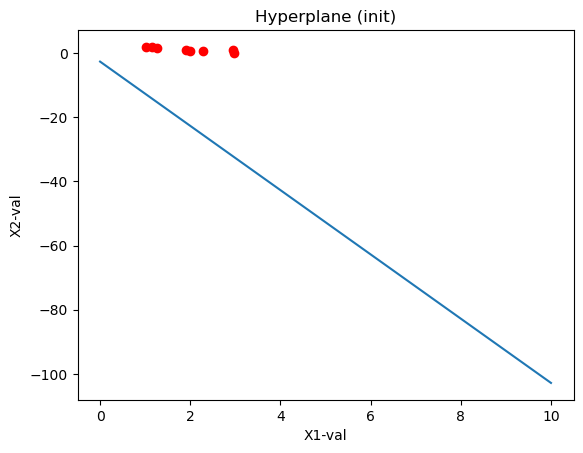

In [12]:

plt.scatter(x1_training, x2_training, color='red')
plt.title("Hyperplane (init)")
plt.xlabel("X1-val")
plt.ylabel("X2-val")
x = np.linspace(0, 10, 1000)
plt.plot(x, theta[0]+theta[1]*x+theta[2]*x)
plt.show()